# 导入包

In [1]:
# coding: utf-8

#csv导入为dataframe的包
import pandas as pd
from pandas import Series, DataFrame
#导入时间和复制的包
import datetime,time
import copy

##解决在jupyter中画图不显示的问题
get_ipython().magic(u'matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
#解决中文编码的问题
import sys
defaultencoding = 'utf-8'
if sys.getdefaultencoding() != defaultencoding:
    reload(sys)
    sys.setdefaultencoding(defaultencoding)


import this

# 导入数据&数据排序&数据去重

In [10]:
data = pd.read_csv("K:/16.12.6-python/data/9.csv", low_memory = False)

In [11]:
#1、数据需要按时间重新排序
data=data.sort(["TIMESTAMP"],ascending=[1]).reset_index(drop=True)#按时间戳进行排序，ascending=1代表递增，0代表递减

In [13]:
#2、此数据中有部分数据重复，需删除；
num=[]
timestamp=data["TIMESTAMP"]
for i in range(len(data.index)-1):
    if timestamp[i]==timestamp[i+1]:#获取数据重复点的索引位置
        num.append(i)
num

[25391,
 25393,
 25395,
 25397,
 29284,
 33598,
 37522,
 38939,
 42384,
 55803,
 57569,
 57571,
 57573,
 61335,
 72112,
 118176,
 123105,
 124698,
 150178,
 156187,
 156189,
 162218,
 162222,
 178477,
 180559,
 180561,
 188852,
 193616,
 195355,
 201669,
 209689,
 209691,
 218273,
 230943,
 235708,
 239380,
 239382,
 245002,
 245679,
 270467,
 270469,
 270471,
 301673,
 318592,
 340275,
 340277,
 346084,
 346357,
 351265,
 366524,
 366526,
 366528,
 366530,
 366532,
 366534,
 366536,
 366538,
 366540,
 366542,
 366544,
 366546,
 366548,
 366550,
 366552,
 366554,
 366556,
 366558,
 366560,
 366562,
 366564,
 366566,
 366568,
 366570,
 366572,
 366574,
 366576,
 366578,
 366580,
 366582,
 366584,
 366586,
 366588,
 366590,
 366592,
 366594,
 366596,
 366598,
 366600,
 366602,
 366604,
 366606,
 366608,
 366610,
 366612,
 366614,
 366616,
 366618,
 366620,
 366622,
 366624,
 366626,
 366628,
 366630,
 366632,
 366634,
 366636,
 366638,
 366640,
 366642,
 366644,
 366646,
 366648,
 366650

In [14]:
len(num)

305394

In [15]:
data=data.drop(num,axis=0).reset_index(drop=True)#删掉重复的数据，只取不重复的数据

In [16]:
data

,TIMESTAMP,DATIME_RX,包头,终端消息命令号,终端消息长度,CAN网络消息命令号,CAN网络消息长度,消息流水号,终端ID,子设备代码,...,系统就绪Ready,高压互锁,DC/AC故障,DC/DC故障,转向助力指令,转向助力状态,空调故障状态,空调状态,内部温度,外部温度
0,1472347248680,2016-08-28 09:20:50,True,0.0,0.0,744.0,193.0,707.0,B30060,2.0,...,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN
1,1472347248849,2016-08-28 09:20:50,True,0.0,0.0,744.0,178.0,708.0,B30060,2.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1472347253669,2016-08-28 09:20:55,True,0.0,0.0,744.0,193.0,709.0,B30060,2.0,...,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN
3,1472347253830,2016-08-28 09:20:55,True,0.0,0.0,744.0,178.0,710.0,B30060,2.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1472347258665,2016-08-28 09:21:00,True,0.0,0.0,744.0,193.0,711.0,B30060,2.0,...,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN
5,1472347258840,2016-08-28 09:21:00,True,0.0,0.0,744.0,178.0,712.0,B30060,2.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1472347263687,2016-08-28 09:21:05,True,0.0,0.0,744.0,193.0,713.0,B30060,2.0,...,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN
7,1472347263828,2016-08-28 09:21:05,True,0.0,0.0,744.0,178.0,714.0,B30060,2.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1472347268668,2016-08-28 09:21:10,True,0.0,0.0,744.0,193.0,715.0,B30060,2.0,...,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN
9,1472347268838,2016-08-28 09:21:10,True,0.0,0.0,744.0,178.0,716.0,B30060,2.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#3、验证数据是否删除完全
num=[]
timestamp=data["TIMESTAMP"]
for i in range(len(data.index)-1):
    if timestamp[i]==timestamp[i+1]:#获取数据重复点的索引位置
        num.append(i)
num

[]

# 分离三个传感器数据

In [53]:
timestamp=data["TIMESTAMP"]
terminalnum=data["终端消息命令号"]
brakeswitch=data["制动开关"]
motorstytle=data["电机1状态"]
data1 = data
data2 = data
data3 = data

In [54]:
#用终端消息命令号来识别，不为0则为传感器3，为0则是传感器1、2
#用制动开关来识别，有值为传感器1，NAN则是传感器2

num1=[]#传感器1,5s采样一次
num2=[]#传感器2，5s采样一次，传感器1采样后100s开始采样
num3=[]#传感器3，30s采样一次
for i in range(len(terminalnum)):
    if terminalnum[i]==0:
        if(not np.isnan(brakeswitch[i]) and np.isnan(motorstytle[i])):
            num1.append(i)
        else:
            num2.append(i)
    else:
        num3.append(i)

In [55]:
data1=data1.loc[num1].reset_index(drop=True)
data2=data2.loc[num2].reset_index(drop=True)
data3=data3.loc[num3].reset_index(drop=True)

In [56]:
num=[]
timestamp=data1["TIMESTAMP"]
for i in range(len(timestamp)-1):
    if((timestamp[i+1]-timestamp[i])<3000):
        num.append(i)
num

[4013,
 4056,
 5591,
 5710,
 6010,
 6780,
 7616,
 8995,
 9078,
 9617,
 11446,
 11448,
 13813,
 14037,
 14091,
 14803,
 14927,
 15026,
 15476,
 16801,
 16802,
 16909,
 17928,
 18128,
 18393,
 18498,
 24764,
 24765,
 24766,
 28481,
 28483,
 28484,
 28485,
 28486,
 28487,
 28488,
 28489,
 28490,
 28491,
 28492,
 28493,
 28494,
 28495,
 28496,
 28497,
 28684,
 28776,
 28880,
 31803,
 34156,
 34605,
 40896,
 41429,
 41430,
 41920,
 42222,
 42255,
 42269,
 42280,
 42283,
 42552,
 42553,
 42997,
 43045,
 43046,
 43047,
 43096,
 43098,
 43099,
 43100,
 43101,
 43102,
 43103,
 43163,
 43164,
 43165,
 43185,
 43186,
 43553,
 43554,
 43702,
 43807,
 43808,
 43909,
 43910,
 43911,
 44065,
 44407,
 44408,
 44413,
 44414,
 44608,
 44637,
 44649,
 44650,
 44651,
 44672,
 44715,
 44716,
 44722,
 44723,
 44730,
 44743,
 44744,
 44750,
 44751,
 44753,
 44754,
 44760,
 44761,
 44764,
 44765,
 44766,
 44767,
 44768,
 44769,
 44770,
 44777,
 44778,
 44788,
 44789,
 44870,
 44871,
 44873,
 44875,
 44876,
 4

In [58]:
data1.loc[4013:4057,["TIMESTAMP","制动开关","电机1状态"]]

,TIMESTAMP,制动开关,电机1状态
4013,1472367333565,0.0,NaN
4014,1472367336461,0.0,NaN
4015,1472367341426,0.0,NaN
4016,1472367346420,0.0,NaN
4017,1472367351421,0.0,NaN
4018,1472367356468,0.0,NaN
4019,1472367361426,1.0,NaN
4020,1472367366462,0.0,NaN
4021,1472367371431,0.0,NaN
4022,1472367376422,0.0,NaN


In [44]:
#将分离出的传感器写入文件
data1.to_csv("K:/16.12.6-python/data/clear1.csv",index=False)
data2.to_csv("K:/16.12.6-python/data/clear2.csv",index=False)#index=false表示去掉列头
data3.to_csv("K:/16.12.6-python/data/clear3.csv",index=False)

# 分离出时间差较大的数据块并存储

In [12]:
#由于排序后索引行号仍与以前相同，data2需重新读入以校正索引行号
data2 = pd.read_csv("K:/16.12.6-python/data/clear1.csv", low_memory = False)

In [14]:
timestamp=data2["TIMESTAMP"]
date=data2["DATIME_RX"]

In [16]:
timestamp=data2["TIMESTAMP"]
date=data2["DATIME_RX"]
timedif=[]
timedifnum=[]
daterecord=[]

for i in range(len(timestamp)-1):
    if((timestamp[i+1]-timestamp[i])>1800000):  #找出时间差大于30min的点，并记录时间
        timedifnum.append(i)
        timedif.append(timestamp[i+1]-timestamp[i])
        daterecord.append(date[i])
len(timedif)

35

In [17]:
timedifnum.insert(0,0)
timedifnum.insert(len(timedifnum),len(timestamp))

In [19]:
for i in range(len(timedifnum)-1):
    addr="K:/16.12.6-python/data/data/"+str(i)+".csv"
    data2[timedifnum[i]+1:timedifnum[i+1]+1].to_csv(addr,index=False)

# 读取数据并画图

In [29]:
data3 = pd.read_csv("K:/16.12.6-python/data/data/0.csv", low_memory = False)

In [30]:
time=data3["TIMESTAMP"]
time2=[]
motor=data3["电机转速"]
speed=data3["速度"]
motor2=[]
mile=data3["总里程"]
mile2=[]
for i in range(len(time)):
    time2.append((time[i]-time[0])/60000.0)#把时间化为分钟

In [35]:
where_are_nan = np.isnan(data3["电机转速"])

In [36]:
#筛除nan值所在的时间和电机转速值
time3=[]
for i in range(len(where_are_nan)):
    if not where_are_nan[i]:
        time3.append(time2[i])
        motor2.append(motor[i])

In [31]:
where_are_nan2 = np.isnan(data3["总里程"])
#筛除nan值所在的时间和里程值
time4=[]
for i in range(len(where_are_nan2)):
    if not where_are_nan2[i]:
        if mile[i]>1000:
            time4.append(time2[i])
            mile2.append(mile[i])

In [43]:
#归一化函数
def MaxMinNormalization(x,Max,Min):  
    x = (x - Min) / (Max - Min);  
    return x;  

In [47]:
mile2=MaxMinNormalization(mile2,np.max(mile2),np.min(mile2))

In [37]:
len(motor2)

7494

In [38]:
len(time3)

7494

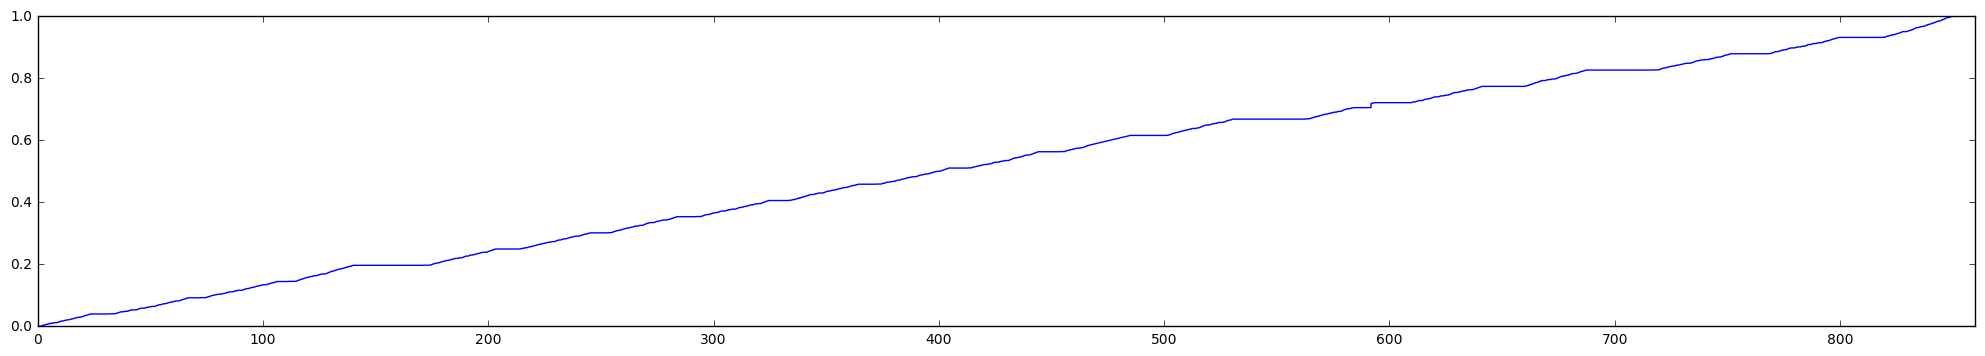

In [48]:
plt.figure(figsize=(25,4))
plt.xlim(xmax=860)
plt.plot(time4,[x for x in mile2])

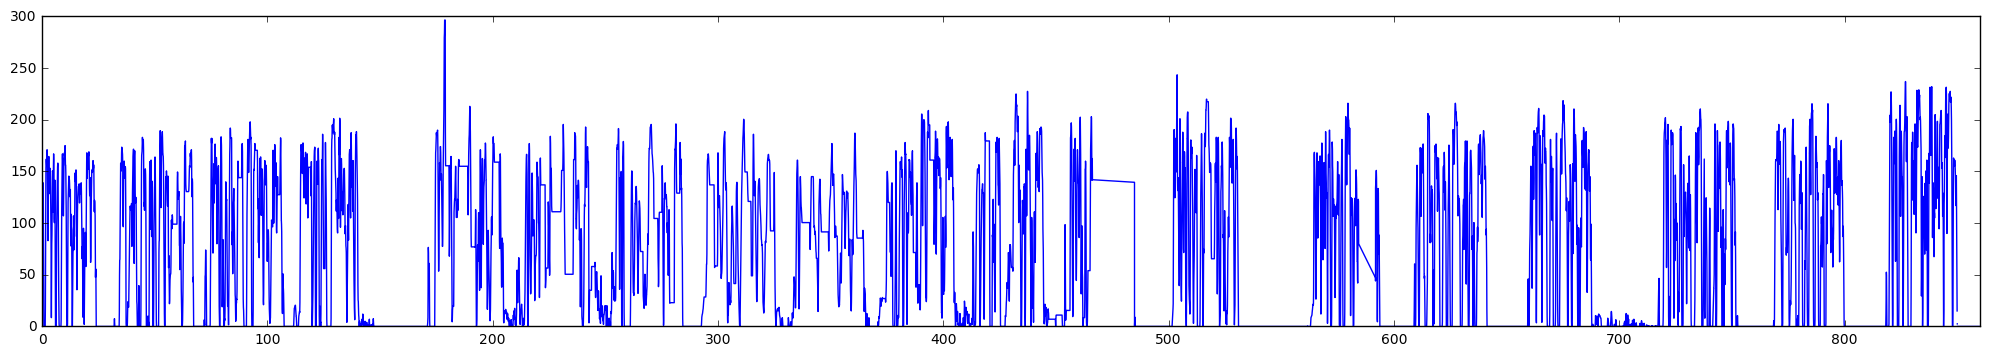

In [40]:
plt.figure(figsize=(25,4))
plt.xlim(xmax=860)
plt.plot(time2,speed)

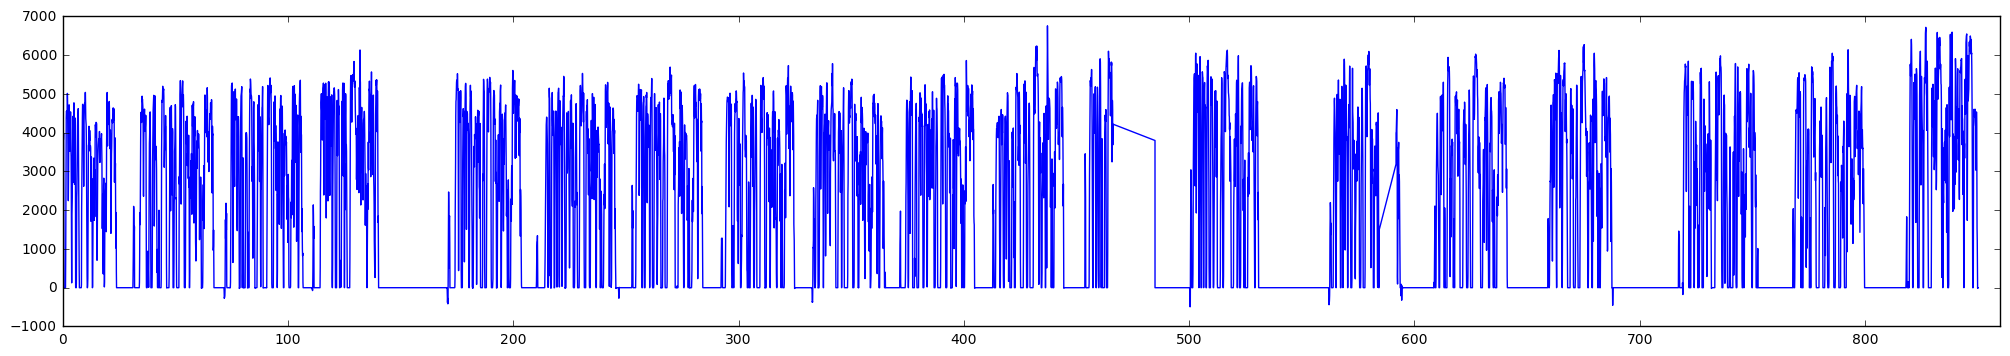

In [41]:
plt.figure(figsize=(25,4))
plt.xlim(xmax=860)
plt.plot(time3,motor2)

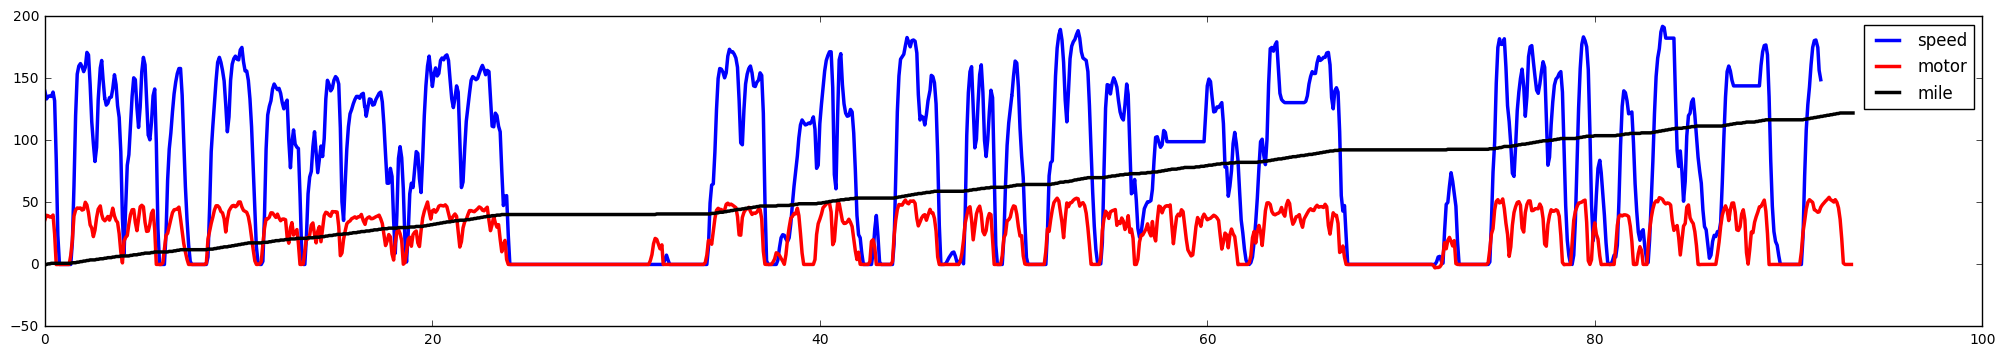

In [50]:
plt.figure(figsize=(25,4))
plt.plot(time2[0:2200],speed[0:2200], color="blue", linewidth=2.5, linestyle="-",label="speed")
plt.plot(time3[0:1000],[x/100. for x in motor2][0:1000], color="red", linewidth=2.5, linestyle="-",label="motor")
plt.plot(time4[0:1000],[x*1000. for x in mile2][0:1000], color="black", linewidth=2.5, linestyle="-",label="mile")
plt.legend(loc='upper right')

# 通过电机转速划分trip

In [10]:
#判断trip点位置
startnum=0
endnum=0
triprecord=[0]
for i in range(len(time3)-1):
    if(motor2[i]<10 and startnum==0):
        startnum=i
    elif(motor2[i]<10 and startnum!=0):
        endnum=i
        if(motor2[i+1]>10):
            if((time3[endnum]-time3[startnum])>10):
                triprecord.append(startnum)
                triprecord.append(endnum)
            else:
                startnum=0
                endnum=0           
    else:
        startnum=0
        endnum=0
triprecord.append(len(time3)-1)   
        

In [11]:
triptime=[]
for i in triprecord:
    triptime.append(time3[i])

In [33]:
triptime

[0.0,
 140.23356666666666,
 171.06251666666665,
 484.85961666666668,
 500.52379999999999,
 530.85668333333331,
 562.34945000000005,
 594.67976666666664,
 608.59508333333338,
 641.25698333333332,
 659.08851666666669,
 687.75168333333329,
 717.16444999999999,
 752.49338333333333,
 767.90790000000004,
 799.73770000000002,
 818.15290000000005,
 850.23246666666671]

In [21]:
#求data3中对应的位置
tripnum=[]
j=0
for i in range(len(time2)):
    if(time2[i]==triptime[j]):
        tripnum.append(i)
        j=j+1
        if(j>(len(triptime)-1)):
            break


In [30]:
range(len(tripnum)/2)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
#把trip生成对应csv
for i in range(len(tripnum)/2):
    addr="K:/16.12.6-python/data/trip/"+str(i)+".csv"
    data3[tripnum[2*i]:tripnum[2*i+1]].to_csv(addr,index=False)

In [72]:
"""
#新建数据框的方法
df={"num":timedifnum,"dif":timedif,"date":daterecord}
df1=pd.DataFrame(data=df)
df1
"""

In [111]:
"""
#时间函数（timestamp->UTC时间）
def timestamp2string(timeStamp):  
    try:  
        d = datetime.datetime.fromtimestamp(timeStamp/1000.0)  
        str1 = d.strftime("%Y-%m-%d %H:%M:%S.%f")  
        # 2015-08-28 16:43:37.283000'  
        return str1  
    except Exception as e:  
        print e  
        return ''
    
#调用方式（13位）    
timestamp2string(timestamp[290891])
"""